<a href="https://colab.research.google.com/github/jessicamli/EE250_FinalProject_Talise_Jessica/blob/main/distances_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from tensorflow.keras.utils import to_categorical

In [11]:
# Load the dataset 'distances.csv' using pandas' read_csv function.
#distances = pd.read_csv('C:\Users\jessi\EE250_FinalProject_Talise_Jessica\distances.csv')
distances = pd.read_csv('distances.csv')
distances.tail(10)

,dist1,dist2,location
50,10,22,4
51,12,8,4
52,11,11,4
53,11,10,4
54,10,9,4
55,10,8,4
56,11,8,4
57,10,10,4
58,12,9,4
59,11,13,4


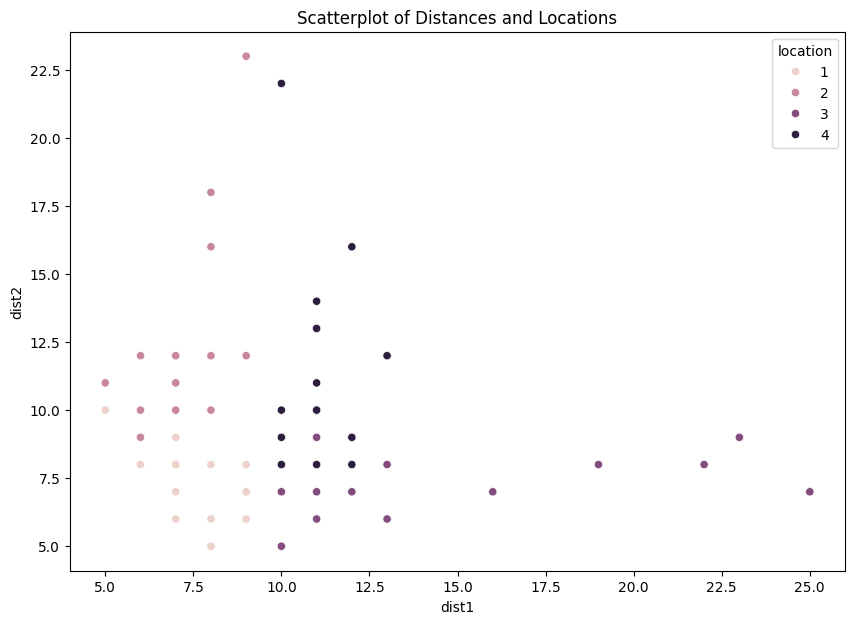

In [12]:
# Visualize the data distribution using a scatterplot
sns.scatterplot(x="dist1", y="dist2", data=distances, hue="location")
plt.title("Scatterplot of Distances and Locations")
plt.show()

In [13]:
# [STUDENT SECTION: Prepare the data for training and testing]
# 1. Data Preparation:
# Prepare the input features (X)

# NOTE: ADDED BELOW -- NOT TOTALLY SURE WHY IT WORKS THO TBH
distances["location"] = distances["location"] - distances["location"].min()

X = distances[["dist1", "dist2"]].to_numpy()

# Convert the denomination values (1 and 2) to binary labels (0 and 1) for binary classification.
# Hint: Subtract 1 from the denomination values to convert them to 0 and 1.
y = distances[["location"]].to_numpy() # Change this

#y = y - 1
y = to_categorical(y)   # COnverts to one-hot encoding

# Split the data into training and testing sets using train_test_split.
# Use an 80/20 split for training and testing and random_state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Set the arguments for train_test_split

# Normalize the input test and train features using StandardScaler to standardize reflectance and weight values.
scaler = StandardScaler()
# Use the scaler's fit_transform and transform methods to standardize the training and testing features.
#  (See https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [14]:
# NOTE: NOT ENTIRELY SURE WHY THE BELOW ORDER WORKS [2 0 1 3]
print(distances["location"].unique())
print(f"Number of unique classes: {len(distances['location'].unique())}")

# [STUDENT SECTION: Define and compile the model]
# 2. Instantiate and Train the Model
# - Build a neural network model using TensorFlow/Keras.
# - The model should have:
#    - An input layer with 2 input features (reflectance and weight).
#    - 1 or 2 hidden layers with the number of neurons at your discretion (use 'relu' activation).
#      (Experiment to find the best accuracy)
#    - An output layer with 1 neuron and 'sigmoid' activation for binary classification.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for 4 classes

# - Compile the model using Adam optimizer with a learning rate of 0.001,
#   binary_crossentropy as the loss function, and 'accuracy' as the metric.
# Changed from binary to categorical
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


# - Train the model using X_train and y_train.
#    - Set validation_split to 0.2.
#    - Use EarlyStopping with patience=5 to prevent overfitting.
#    - Train the model for 100 epochs and use a batch size of 32.
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# call the appropriate function to train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping], verbose=1)


[2 0 1 3]
Number of unique classes: 4


/opt/homebrew/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3149 - loss: 1.3098 - val_accuracy: 0.8000 - val_loss: 0.8891
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7473 - loss: 0.8767 - val_accuracy: 0.8000 - val_loss: 0.5864
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7511 - loss: 0.6732 - val_accuracy: 0.8000 - val_loss: 0.5185
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7705 - loss: 0.5268 - val_accuracy: 0.8000 - val_loss: 0.5093
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7938 - loss: 0.4824 - val_accuracy: 0.8000 - val_loss: 0.4876
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8405 - loss: 0.4649 - val_accuracy: 0.8000 - val_loss: 0.4434
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8715 - loss: 0.3929 - val_accuracy: 0.8000 - val_loss: 0.3149
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9146 - loss: 0.2751 - val_accuracy: 0.8000 - val_loss: 0.2586

**#experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [15]:
# [STUDENT SECTION: Evaluate the model]
# Hint:
# - Call model.evaluate() on the test set (X_test, y_test) and print the test accuracy.
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy = %.2f' %(accuracy*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8333 - loss: 0.4257
Accuracy = 83.33


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


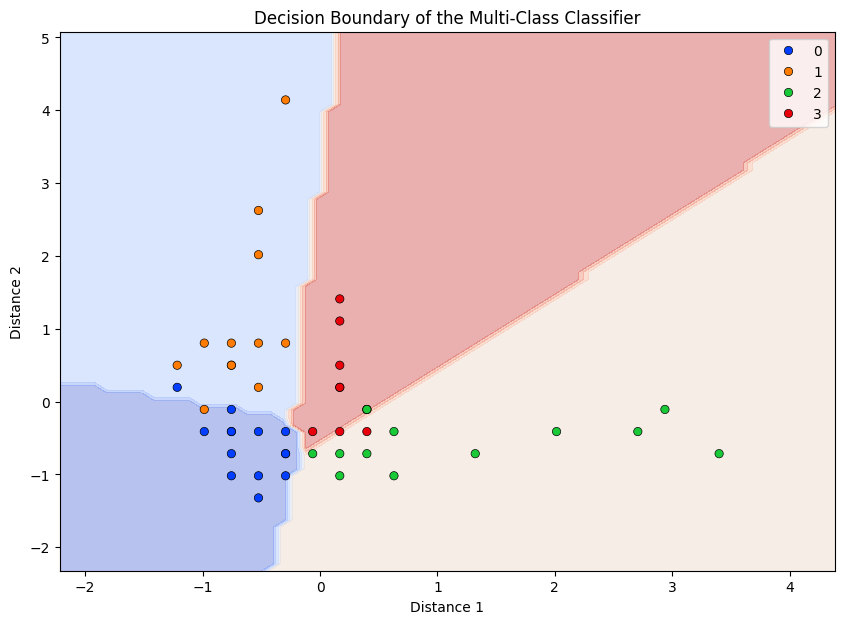

In [16]:
# 4. Plot the Decision Boundary:
# - Define a function to plot the decision boundary of the trained model. This function should take in the feature matrix X, the labels y, and the trained model.
# - This function should:
#    - Generate a mesh grid over the feature space (reflectance and weight).
#    - Use the model to predict labels for each point in the mesh grid.
#    - Plot the decision boundary using contourf.
#    - Overlay the training data points using seaborn's scatterplot.
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert probabilities into class predictions by getting index of max probability and reshaping to match the grid shape
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.argmax(y, axis=1), palette='bright', edgecolor="k")

    plt.xlabel('Distance 1')
    plt.ylabel('Distance 2')
    plt.title('Decision Boundary of the Multi-Class Classifier')
    plt.show()


# [STUDENT SECTION: Call the function to plot the decision boundary by passing the correct arguments]
plot_decision_boundary(X_train, y_train, model)




In [17]:
# 5. Save the Trained Model:
# - Save the trained model to a file named 'model.h5' using model.save().
model.save('distmodel.h5')

# [STUDENT SECTION: Save the model]

# 6. Load the Saved Model and Use it to evalue the "test" data:
# - Load the model using keras.models.load_model and re-evaluate it on the test data.
new_model = load_model('distmodel.h5')


test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print('Accuracy = %.2f' %(test_accuracy*100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8333 - loss: 0.4257
Accuracy = 83.33


In [18]:
# 7. [STUDENT SECTION: Evaluate the loaded model on the test data]
# the accuracy of the loaded model on the test data.  Examine the output
# of predict and think about how to compute the accuracy of the predictions using
# the y_test data.  Hint:  You may need to round the predictions to 0 or 1 using np.round()
# When you use model.predict() in a binary classification problem, the output is usually
# a 2D array where each element is a list containing a single predicted probability
# (e.g., [[0.1], [0.9], [0.3], ...]). To compare these predictions to your 1D y_test array
# (e.g., [0, 1, 0, ...]), you need to "flatten()" the 2D array into a 1D array.


# print the accuracy of the loaded model on the test data

# Evaluate the model on the test data using predict
predictions = new_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

#predictions = predictions.flatten()
y_test_flat = np.argmax(y_test, axis=1)

# count how many are wrong
count = 0
for i in range(len(predictions)):
    if predictions[i] != y_test_flat[i]:
        count += 1

accuracy = 100 * (len(predictions) - count) / len(predictions)
print('Accuracy = %.2f' %(accuracy))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Accuracy = 83.33
